# **Building a Convolutional Neural Network Using Deep Learning**
In this notebook, we will be building a **CNN model** used to classify images of dogs and cats using **keras library and tensorflow backend**. Also, we will be using transfer learning to load a predefined model VGG16 and use it to classify the images as well. The various steps that we will take in order to build the models are as follows:

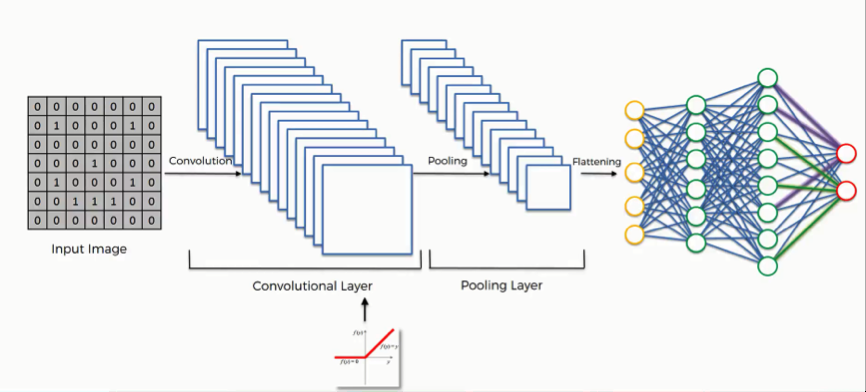
* Preparing the Data


    1. Importing the libraries and mounting the data.
    2. Unzipping the data
    3. Display random images of cats and dogs from data
    4. Creating Folders for training, validaton and testing data
    5. Dividing the training data into two parts
        
* Building the CNN model
* Performing Data Augmentation on training and test data
* Defining the Callback functions
* Fitting the CNN model to data
* Evaluating and predicting the results
* Saving the model and weights
* Loading the VGG16 model for transfer learning
* Fitting the VGG16 model to data
* Evaluating the VGG16 model results


---

##          ***Importing the libraries and mounting the data***

In [ ]:
# Importing the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.callbacks.callbacks import EarlyStopping,ModelCheckpoint,CSVLogger
from livelossplot import PlotLossesKeras
from keras.applications import VGG16,VGG19
from keras.models import Model
import os
import zipfile
import glob
import shutil
print(os.listdir('../input/dogs-vs-cats'))

## *Unzipping the Data*

In [ ]:
# Unipping the data
zip_files = glob.glob('../input/*/*.zip')
print(zip_files)

# extract file into a temp folder
def extract_zip(file):
    with zipfile.ZipFile(file,"r") as zip_ref:
        zip_ref.extractall("data")
        
# extract both train and test1 zip
for files in zip_files:
    extract_zip(files)

In [ ]:
# Checking the new files along with number of samples
print(os.listdir('data'))
print(len(os.listdir('/kaggle/working/data/train')),'Training Samples')
print(len(os.listdir('/kaggle/working/data/test1')),'Testing Samples')

In [ ]:
# Checking the names of few data samples
print(os.listdir('/kaggle/working/data/train')[:5])

## *Display random images of cats and dogs from data*

In [ ]:
plt.figure(figsize=(10,10)) # specifying the overall grid size
# define location of dataset
folder = '/kaggle/working/data/train'
for i in range(25):
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    filename = folder + '/dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
    plt.imshow(image)

plt.show()

In [ ]:
# plot dog photos from the dogs vs cats dataset

# define location of dataset
folder = '/kaggle/working/data/train'
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# define filename
	filename = folder + '/dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	plt.imshow(image, aspect = 'auto')
# show the figure
plt.show()

In [ ]:
# plot cat photos from the dogs vs cats dataset

# define location of dataset
folder = '/kaggle/working/data/train'
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # define filename
    filename = folder + '/cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image, aspect = 'auto')
# show the figure
plt.show()

## *Creating folders for Training, Validation and Testing Data*

In [ ]:
# create new directories for training data and validation data
dataset_home = 'dataset/'
subdirs = ['training_set/', 'validation_set/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		os.makedirs(newdir, exist_ok=True)

In [ ]:
# create new directory for test data
testdir = dataset_home + 'testing_set'
os.makedirs(testdir, exist_ok= True)
dirs = '/kaggle/working/dataset/testing_set/' + 'Test'
os.makedirs(dirs,exist_ok = True)

In [ ]:
print(os.listdir(dataset_home))

## *Dividing the training data into two parts*

In [ ]:
# Dividng the training data into two parts, one for training and other for validation

# seed random number generator
from random import random
from random import seed
seed(1)
# define ratio of pictures to use for validation
validation_ratio = 0.25
# copy training dataset images into subdirectories
from shutil import copyfile
training_source = '/kaggle/working/data/train/'
for file in os.listdir(training_source):
	src = training_source + '/' + file
	destination = 'training_set/'
	if random() < validation_ratio:
		destination = 'validation_set/'
	if file.startswith('cat'):
		dst = dataset_home + destination + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + destination + 'dogs/'  + file
		copyfile(src, dst)

In [ ]:
# Deleting the images in test folder if needed in order to get results on more random images
a = glob.glob('/kaggle/working/dataset/testing_set/Test/*.jpg')
for j in a:
    os.remove(j)

In [ ]:
# Creating some samples for classifying images using the build model
test_source = "/kaggle/working/data/test1"
#print(os.listdir(test_source)[:5])
test_dest = "/kaggle/working/dataset/testing_set/Test"
# Selecting 10 random files from the test main folder
random_samples = np.random.choice(os.listdir(test_source),10)
for file in random_samples:
    new_src = test_source + '/' + file
    shutil.copy(new_src,test_dest)
print(os.listdir(test_dest))

## *Building the Convolutional Neural Network (CNN) model*

In [ ]:
# Building the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(200,200,3), activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units = 256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

## *Performing the data augmentation to prevent overfitting*

In [ ]:
# Preparing the data and performing Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory('dataset/training_set',
                                                target_size=(200, 200),
                                                batch_size=64,
                                                class_mode='binary')
validation_set = validation_datagen.flow_from_directory('dataset/validation_set',
                                                target_size=(200, 200),
                                                batch_size=64,
                                                class_mode='binary')
test_set = test_datagen.flow_from_directory('dataset/testing_set',
                                                target_size=(200, 200),
                                                batch_size=1,class_mode = 'binary',shuffle = False)

## *Creating files for storing model*

In [ ]:
# Creating h5 file for storing best_model data
with open('best_model.h5', 'w') as best:
    pass
# Creating CSV file for storing losses
with open('CSVLogs.csv','w') as loss:
    pass

## *Building the Callback Functions*

In [ ]:
# Creating the callback functions
es = EarlyStopping(monitor='val_loss',mode= 'min',verbose=1,patience=10,restore_best_weights=True)
mc = ModelCheckpoint('best_model.h5',monitor='val_loss',mode= 'min',verbose=1,save_best_only=False)
csv = CSVLogger('CSVLogs.csv',separator=',', append=False)

## *Fitting the CNN model to data*

In [ ]:
# Fitting the model to data
output = model.fit_generator(train_set, steps_per_epoch=(18697//64),epochs= 20,
                             validation_data = validation_set, validation_steps= (6303//64),
                             callbacks=[es,mc,csv,PlotLossesKeras()])

## *Evaluating and Testing the model*

In [ ]:
# Evalauting the model
loss,score = model.evaluate_generator(validation_set,steps = (6303//64), verbose = 0)
print('accuracy : %.3f'% (np.round(score*100,1)))

In [ ]:
# Testing the model
probabilities = model.predict_generator(test_set)

## *Plotting results along with the image*

In [ ]:
# Plotting the probabilities along with images:
for index, probability in enumerate(probabilities):
    image_path = "/kaggle/working/dataset/testing_set/" + test_set.filenames[index]
    img = imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% dog")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% cat")
    plt.show()

In [ ]:
# Making new single predictions
def detect_image(filepath):
    test_image = load_img(filepath, target_size = (200,200))
    plt.imshow(test_image)
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    train_set.class_indices
    if result[0][0] == 1:
        prediction = 'dog'
    else:
        prediction = 'cat'
    plt.title(prediction)

detect_image('/kaggle/working/dataset/testing_set/Test/5490.jpg')


## *Saving our CNN model along with weights*

In [ ]:
# save model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# save weights to HDF5
with open("model.h5",'w') as h5_file:
    pass
model.save_weights("model.h5")
print("Saved model to disk")

## *Loading the VGG19 model for transfer learning*

In [ ]:
# Loading the VGG model using Transfer Learning
transfer_model = VGG16(include_top = False, weights = 'imagenet',input_shape = (200,200,3))
for layer in transfer_model.layers:
    layer.trainable = False
# Defining the output layers
flat = Flatten()(transfer_model.layers[-1].output)
class1 = Dense(units = 256, activation='relu')(flat)
class2 = Dense(units = 256, activation = 'relu')(class1)
output = Dense(units = 1, activation='sigmoid')(class2)
# define new model
transfer_model = Model(inputs=transfer_model.inputs, outputs=output)
transfer_model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.001),
            metrics=['accuracy'])

## *Fitting the VGG19 model to the data*

In [ ]:
transfer_model.fit_generator(train_set, steps_per_epoch=(18697//64),epochs= 10,
                             validation_data = validation_set, validation_steps= (6303//64),
                             callbacks = [csv,PlotLossesKeras()])

## *Evaluating the VGG19 model results*

In [ ]:
# Evalauting the model
loss,score = transfer_model.evaluate_generator(validation_set,steps = (6303//64), verbose = 0)
print('accuracy : %.3f'% (np.round(score*100,1)))